
### 1) Read the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import SGDRegressor
from google.colab import drive
#drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Boston -> target - MEDV(Meidan value of house in $1000s), not time-series data
# Ames -> target - SalePrice
# California -> target - median_house_value
# Kaggle Competition data ->
# Antrim dataset ->

In [ ]:
ames_df = pd.read_csv("/content/drive/MyDrive/data/Ames_housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv(r'/content/drive/MyDrive/data/Boston_housing.csv', delim_whitespace=True, names=names)
california_df = pd.read_csv("/content/drive/MyDrive/data/California_housing.csv")
kaggle_df_train = pd.read_csv("/content/drive/MyDrive/data/Kaggle_Competition/train.csv")
kaggle_df_test = pd.read_csv("/content/drive/MyDrive/data/Kaggle_Competition/test.csv")
antrim_df = pd.read_csv("/content/drive/MyDrive/data/antrim_newtownabbey.csv")

In [ ]:
california_df.shape

(20640, 14)

In [ ]:
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
ames_df.shape

(1460, 81)

In [ ]:
california_df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
california_df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


### 2) Preprocess the dataframes

In [ ]:
# ames_df.info()

In [ ]:
# Dealing with Null Values

def remove_null_values(check_dataframe):
  if len(check_dataframe.columns[check_dataframe.isna().sum()>0]) > 0:
    print("The columns with null values before preprocessing are : ",check_dataframe.columns[check_dataframe.isna().sum()>0])

    # 1) Remove the columns which have 40% or more null values
    if len(check_dataframe.columns[(check_dataframe.isna().sum()/check_dataframe.shape[0]) > 0.4].tolist())>0:
      print("These columns have more than 40% null values hence they will be removed : \n",check_dataframe.columns[(check_dataframe.isna().sum()/check_dataframe.shape[0]) > 0.4].tolist())
      check_dataframe.drop(columns=check_dataframe.columns[(check_dataframe.isna().sum()/check_dataframe.shape[0]) > 0.4].tolist(), inplace=True)

    # 2) Fill in the Null values with the mean values
    check_dataframe.fillna(check_dataframe.mean(),inplace=True)
    print("The columns with null values after forward fill are : \n",check_dataframe.columns[check_dataframe.isna().sum()>0])

    # 3) Fill in the mean for the remaining columns if type is int else remove them
    if len(check_dataframe.columns[check_dataframe.isna().sum()>0]) > 0:
        check_dataframe.dropna(inplace=True)

    if len(check_dataframe.columns[check_dataframe.isna().sum()>0]) > 0:
      return False
    else:
      return True
  else:
    return True

if remove_null_values(ames_df):
  print("All null values are removed in ames dataframe")
if remove_null_values(boston_df):
  print("All null values are removed in boston dataframe")
if remove_null_values(california_df):
  print("All null values are removed in california dataframe")

The columns with null values before preprocessing are :  Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
These columns have more than 40% null values hence they will be removed : 
 ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
The columns with null values after forward fill are : 
 Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')
All null values are removed in ames dataframe
All null values are removed in boston dataframe
All null values are removed in california dataframe


In [ ]:
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Perform label encoding

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

def label_encoding(dataframe):
  for column in dataframe.columns:
    accepted_dtype = ["int64","float64","datetime64"]
    if dataframe[column].dtype not in accepted_dtype:
      dataframe[column] = l.fit_transform(dataframe[column])

label_encoding(ames_df)
label_encoding(boston_df)
label_encoding(california_df)

### 3) Feature Selection using correlation and information gain metric



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(ames_df), sns.distplot(boston_df)

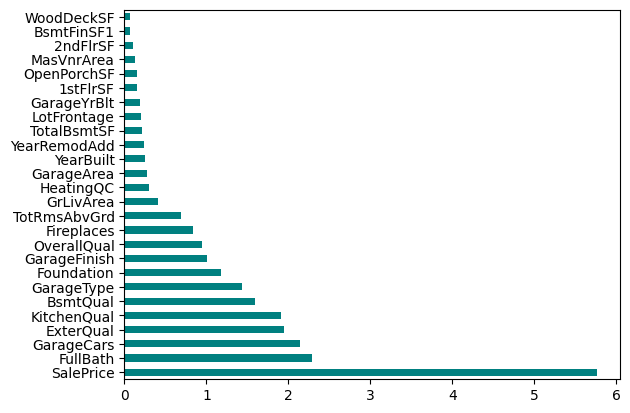

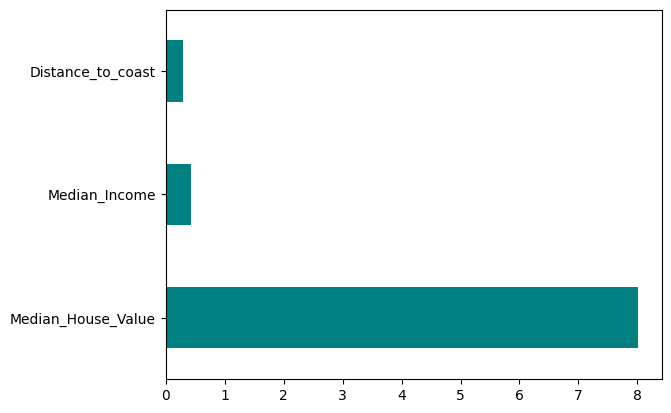

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

def select_features(dataframe,num_columns,target_column):
  #1) Select the features which have atleast 30% correlation
  highly_correlated_features = dataframe.columns[~dataframe.corr()[target_column].between(-0.3,0.3, inclusive='both')]

  try:
    #2) Use information gain to filter out more features
    importances = mutual_info_classif(dataframe[highly_correlated_features.tolist()],dataframe[target_column])
    feat_importance = pd.Series(importances,highly_correlated_features).sort_values(ascending=False)

    feat_importance.plot(kind="barh",color="teal")
    plt.show()

    # 3) Create a new dataframe with which includes only the most important features
    new_df = dataframe[feat_importance[1:num_columns+1].index.tolist()]
  except:
    feat_importance = abs(boston_df.corr()["MEDV"]).sort_values(ascending=False)
    new_df = dataframe[feat_importance[:num_columns+1].index.tolist()]
  return new_df

ames_new_df = select_features(ames_df,10,"SalePrice")
boston_new_df = select_features(boston_df,10,"MEDV")
california_new_df = select_features(california_df,10,"Median_House_Value")

In [ ]:
def implement_online(dataframe,important_features,target):

  rows, col = dataframe.shape
  length = int(rows/100*70)

  # Fit 70% of the data
  X_initial, y_initial = dataframe.iloc[0:length][important_features],dataframe.iloc[0:length][target]
  X_train, X_test, y_train, y_test = train_test_split(X_initial,y_initial,test_size=0.2,random_state=5)
  reg = SGDRegressor(warm_start=True)
  reg.partial_fit(X_train,y_train)
  y_pred_reg = reg.predict(X_test)
  initial_error = mean_squared_error(y_pred_reg,y_test)

  # Online learning for 30%
  updated_errors = []
  for idx, rows in dataframe.iloc[length:].iterrows():
    reg.partial_fit([rows[important_features]],[rows[target]])
    y_pred_reg = reg.predict(X_test)
    updated_errors.append(mean_squared_error(y_pred_reg,y_test))

  print(sum(updated_errors)/len(updated_errors))

### 4) BOSTON Dataframe Visualization

#### a) Visualize the Target

Text(0.5, 1.0, 'Histogram of the target Price')

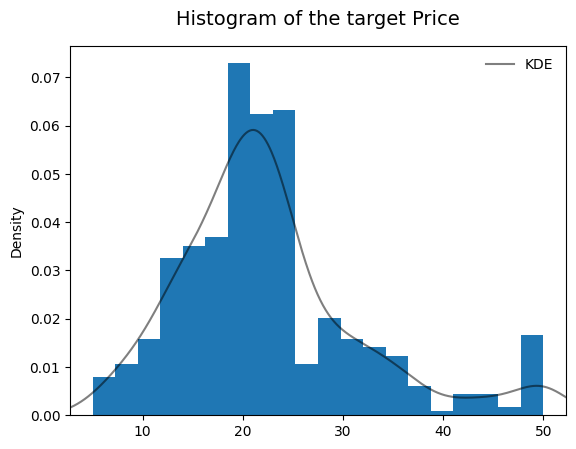

In [ ]:
#1) Visualize target
ax = boston_new_df["MEDV"].hist(bins=20,density=True)
xlim = ax.get_xlim()

# Plot pandas KDE
boston_new_df["MEDV"].plot.density(color='k', alpha=0.5, ax=ax)

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Histogram of the target Price', fontsize=14, pad=15)

#### b) Correlation Matrix

<Axes: >

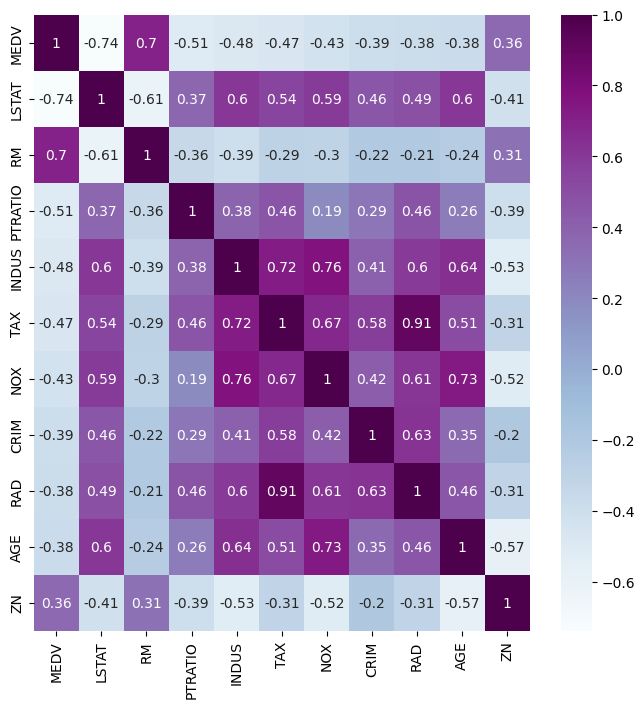

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(boston_new_df.corr(),annot=True,cmap="BuPu")

#### c) Scatterplot to view the correlation

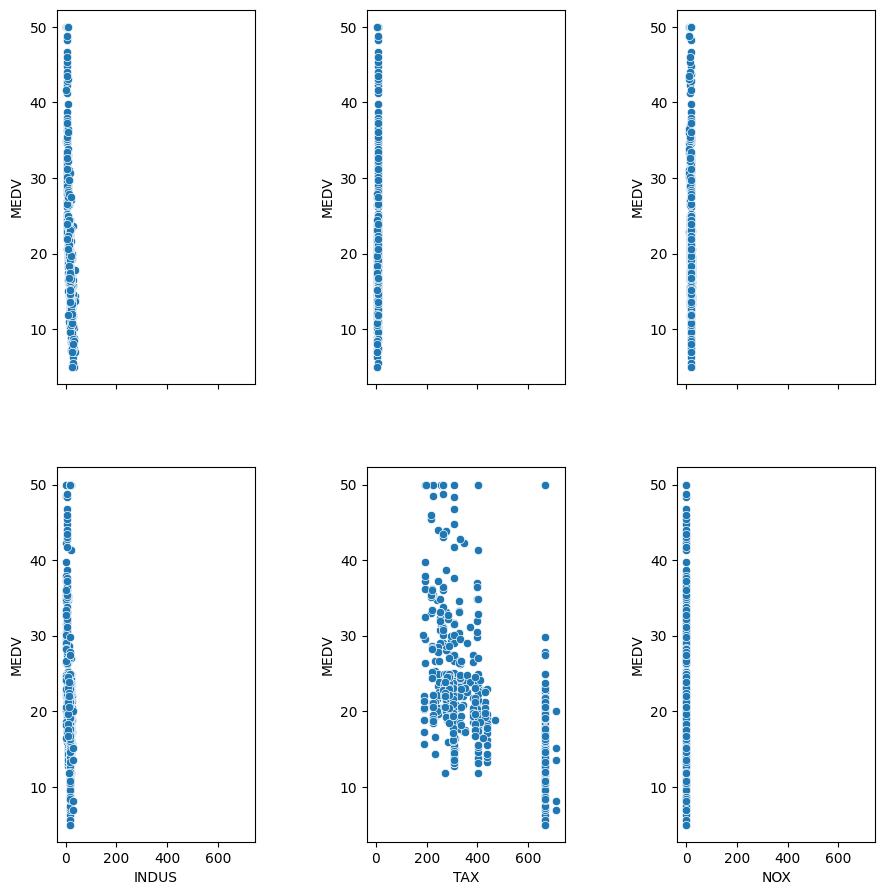

In [ ]:
#3) Scatter plot of 6 most correlated with target
fig,axes = plt.subplots(2,3,sharex=True,figsize=(10,10))
fig.tight_layout(pad=5.0)
features = abs(boston_new_df.corr()["MEDV"]).sort_values(ascending=False).index.tolist()[1:7]
row,col=0,0
for idx,val in enumerate(features):
  if idx==3:
    row=1
    col=0
  sns.scatterplot(ax=axes[row,col], data=boston_new_df,x=val,y="MEDV") # Add hue
  col+=1

#### d) Swarmplot

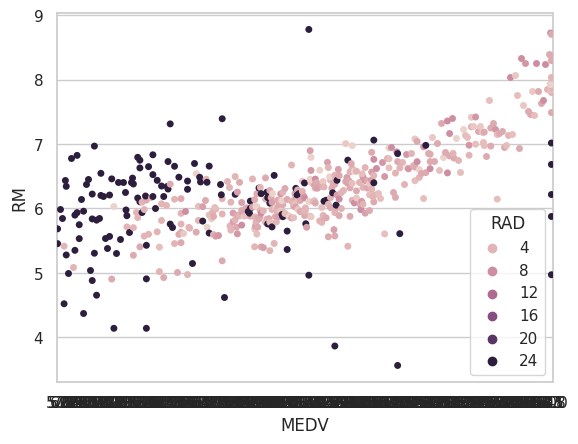

In [ ]:
#4) sns.histplot(boston_new_df)
sns.set_theme(style="whitegrid", palette="dark")
ax = sns.swarmplot(data=boston_new_df, y="RM", x="MEDV", hue="RAD")

### 5) Model Prediction for Boston data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error

X = boston_new_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN']]
y = boston_new_df["MEDV"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print(reg.intercept_)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

32.94937706762711
The mean squared error for LinearRegression : 23.96022495722473
The mean squared error for LassoRegression : 25.40568483465784
The mean squared error for SVR : 59.143288133272655


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

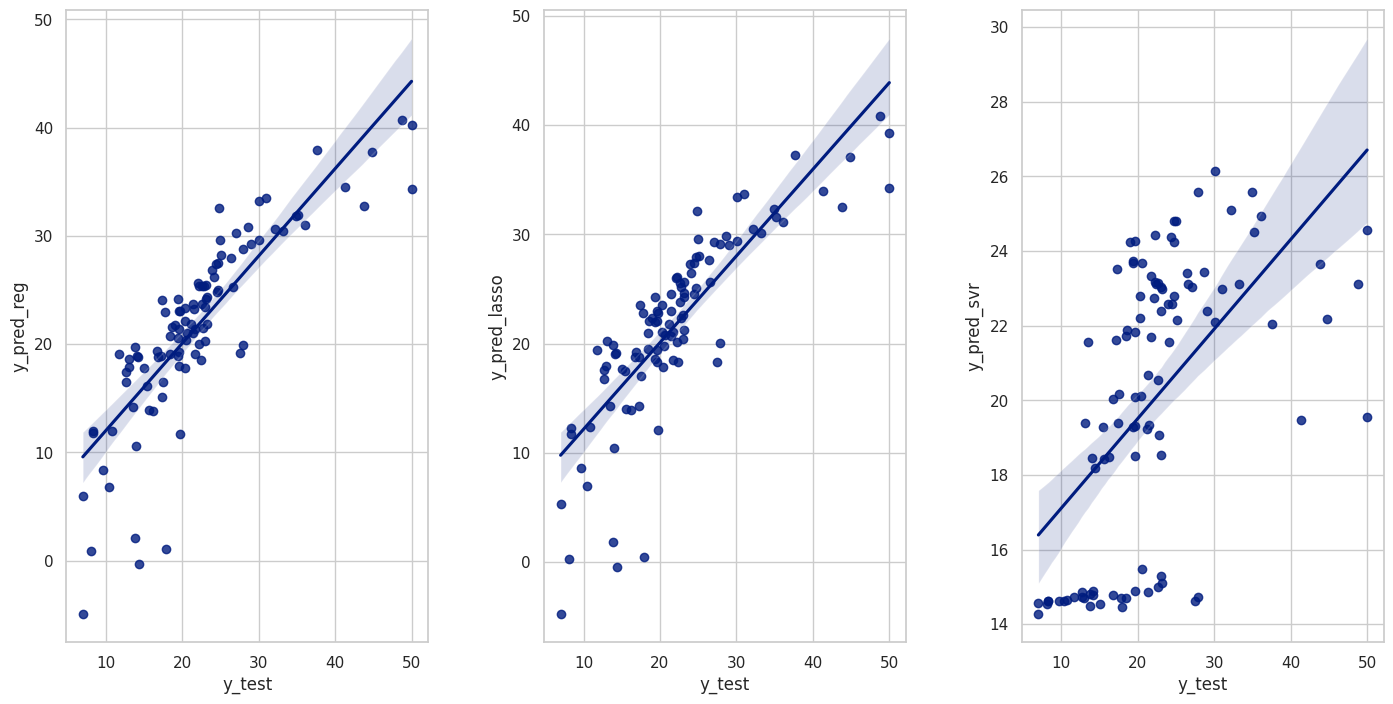

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(boston_new_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(boston_new_df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=boston_new_df.index, columns=boston_new_df.columns)

In [ ]:
scaled_features_df.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,RAD,AGE,ZN
0,0.159686,-1.075562,0.413672,-1.459000,-1.287909,-0.666608,-0.144217,-0.419782,-0.982843,-0.120013,0.284830
1,-0.101524,-0.492439,0.194274,-0.303094,-0.593381,-0.987329,-0.740262,-0.417339,-0.867883,0.367166,-0.487722
2,1.324247,-1.208727,1.282714,-0.303094,-0.593381,-0.987329,-0.740262,-0.417342,-0.867883,-0.265812,-0.487722
3,1.182758,-1.361517,1.016303,0.113032,-1.306878,-1.106115,-0.835284,-0.416750,-0.752922,-0.809889,-0.487722
4,1.487503,-1.026501,1.228577,0.113032,-1.306878,-1.106115,-0.835284,-0.412482,-0.752922,-0.511180,-0.487722


In [ ]:
X = scaled_features_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN']]
y = scaled_features_df["MEDV"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

The mean squared error for LinearRegression : 0.283823157194775
The mean squared error for LassoRegression : 0.2848113869554128
The mean squared error for SVR : 0.13452197377177458


In [ ]:
scaled_features_df.columns

Index(['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD',
       'AGE', 'ZN'],
      dtype='object')

In [ ]:
implement_online(scaled_features_df,['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE','ZN'],"MEDV")

0.2575101645486894


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

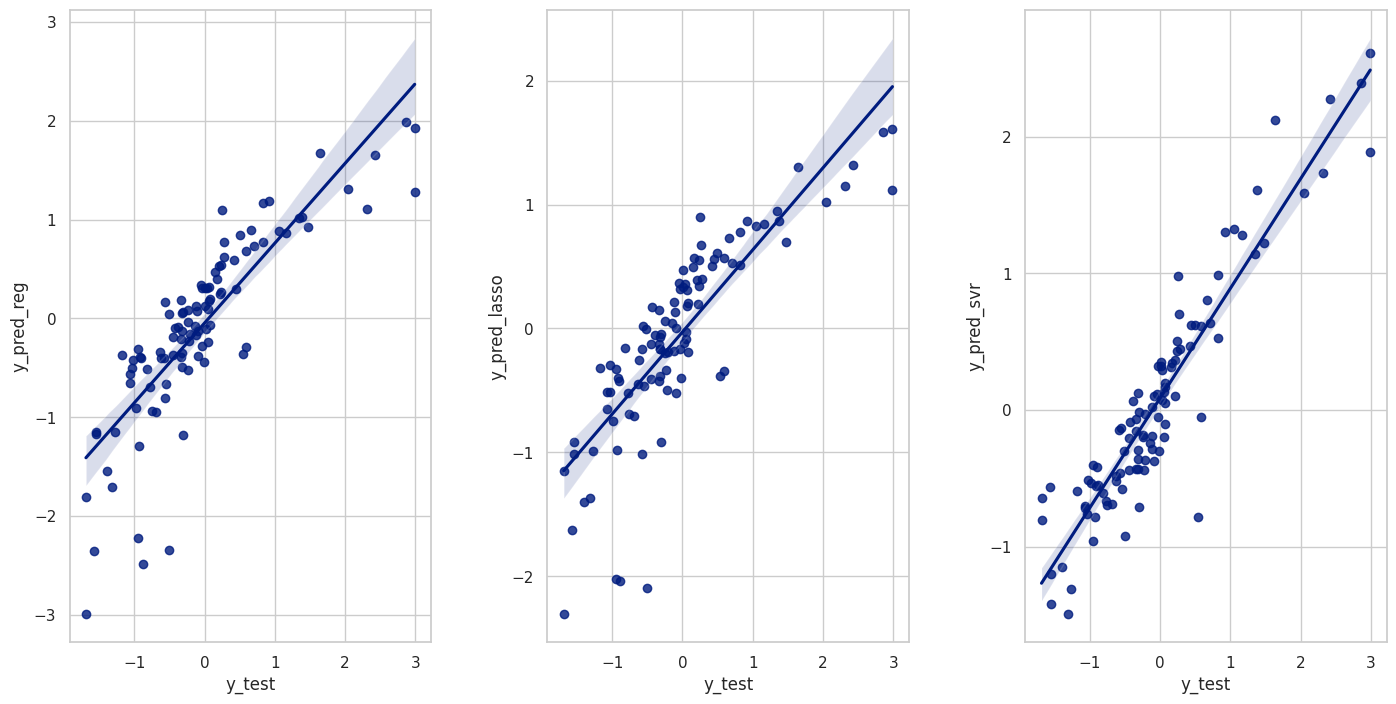

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

### 6) Ames Dataframe Visualization

#### a) Visualize the Target

In [ ]:
ames_new_df["SalePrice"] = ames_df["SalePrice"]

<Axes: xlabel='SalePrice', ylabel='Density'>

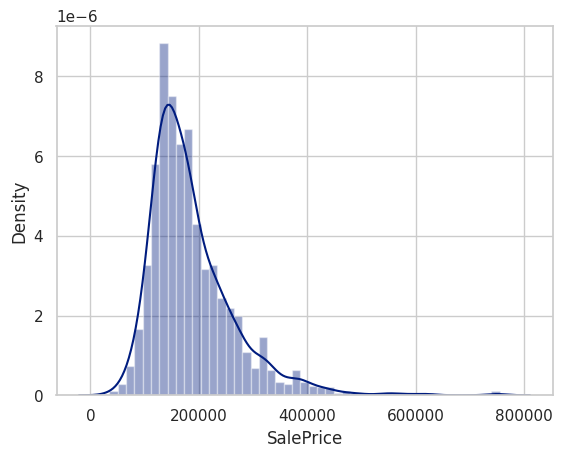

In [ ]:
sns.distplot(ames_new_df["SalePrice"])

#### b) Correlation Matrix

<Axes: >

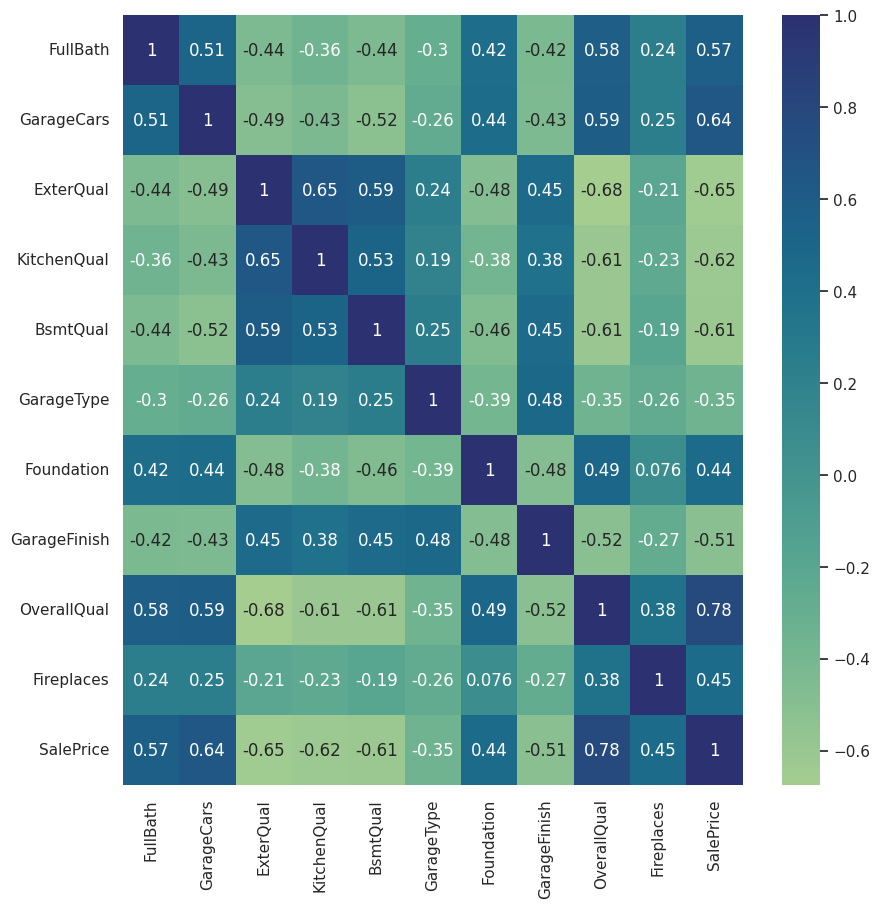

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(ames_new_df.corr(),annot=True,cmap="crest")

#### c) Boxplot to view the distribution

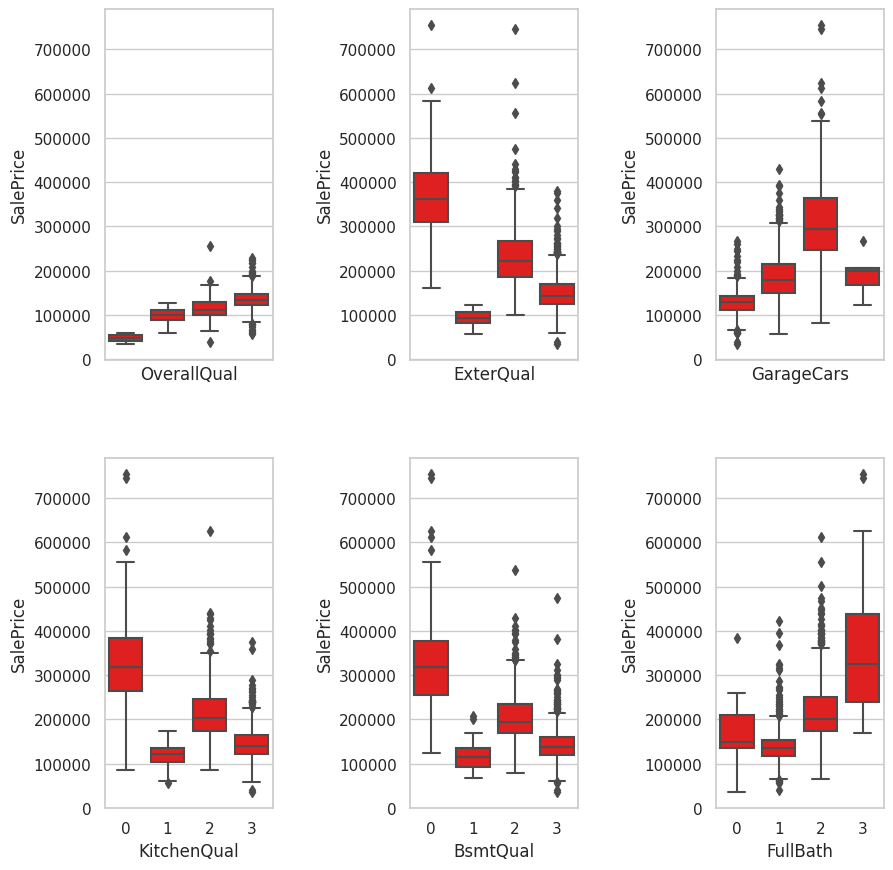

In [ ]:
#3) Box plot of 6 most correlated with target
fig,axes = plt.subplots(2,3,sharex=True,figsize=(10,10))
fig.tight_layout(pad=5.0)

features = abs(ames_new_df.corr()["SalePrice"]).sort_values(ascending=False).index.tolist()[1:7]
row,col=0,0
for idx,val in enumerate(features):
  if idx==3:
    row=1
    col=0
  sns.boxplot(ax=axes[row,col], data=ames_new_df,x=val,y="SalePrice",color="Red") # Add hue
  col+=1

### 7) Model Prediction for Ames data

In [ ]:
ames_new_df.columns

Index(['FullBath', 'GarageCars', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'GarageType', 'Foundation', 'GarageFinish', 'OverallQual', 'Fireplaces',
       'SalePrice'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error

X = ames_new_df[['ExterQual', 'FullBath', 'GarageCars', 'KitchenQual', 'GarageType', 'BsmtQual',
                 'Foundation', 'OverallQual', 'GarageFinish', 'Fireplaces']]
y = ames_new_df["SalePrice"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print(reg.intercept_)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf2 = SVR(C=1.0,epsilon=0.5)
clf2.fit(X_train,y_train)
y_pred_svr = clf2.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

83186.37354540775
The mean squared error for LinearRegression : 1530727564.3960886
The mean squared error for LassoRegression : 1530723707.0122752
The mean squared error for SVR : 5450760154.5454235


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

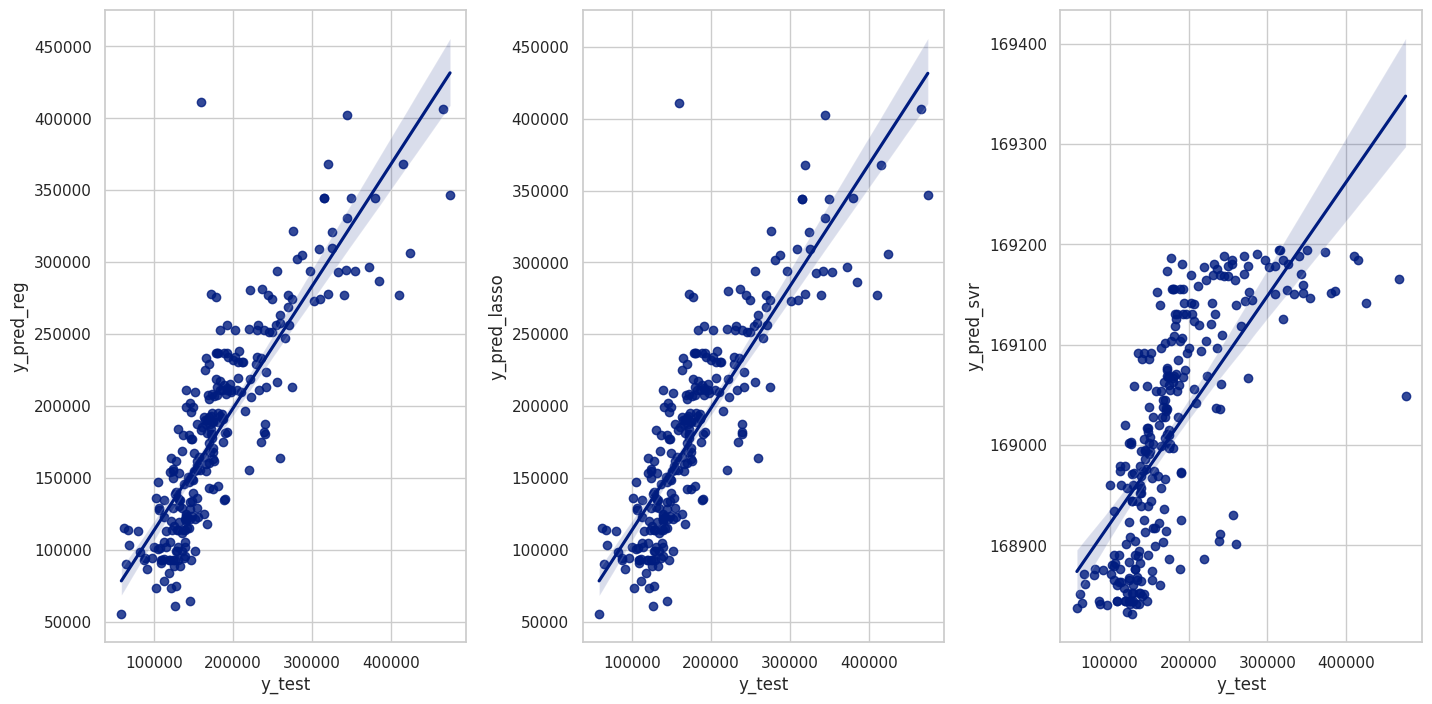

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(ames_new_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(ames_new_df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=ames_new_df.index, columns=ames_new_df.columns)

In [ ]:
scaled_features_df.head()

,FullBath,GarageCars,ExterQual,KitchenQual,BsmtQual,GarageType,Foundation,GarageFinish,OverallQual,Fireplaces,SalePrice
0,0.775560,0.202747,-0.741877,-0.390085,-0.274488,-0.706793,0.918767,-0.216113,0.589337,-1.005546,0.275571
1,0.775560,0.202747,0.688427,0.815306,-0.274488,-0.706793,-0.569502,-0.216113,-0.165963,0.544478,-0.066702
2,0.775560,0.202747,-0.741877,-0.390085,-0.274488,-0.706793,0.918767,-0.216113,0.589337,0.544478,0.465722
3,-1.051375,1.779928,0.688427,-0.390085,0.866087,1.544847,-2.057772,1.014352,0.589337,0.544478,-0.592789
4,0.775560,1.779928,-0.741877,-0.390085,-0.274488,-0.706793,0.918767,-0.216113,1.344638,0.544478,0.801657


In [ ]:
X = scaled_features_df[['ExterQual', 'FullBath', 'GarageCars', 'KitchenQual', 'GarageType',
       'BsmtQual', 'Foundation', 'OverallQual', 'GarageFinish', 'Fireplaces']]
y = scaled_features_df["SalePrice"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

The mean squared error for LinearRegression : 0.24598927394068257
The mean squared error for LassoRegression : 0.22528683251235992
The mean squared error for SVR : 0.235587533461344


In [ ]:
implement_online(scaled_features_df,['ExterQual', 'FullBath', 'GarageCars', 'KitchenQual', 'GarageType',
       'BsmtQual', 'Foundation', 'OverallQual', 'GarageFinish', 'Fireplaces'],"SalePrice")

0.2289466010965357


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

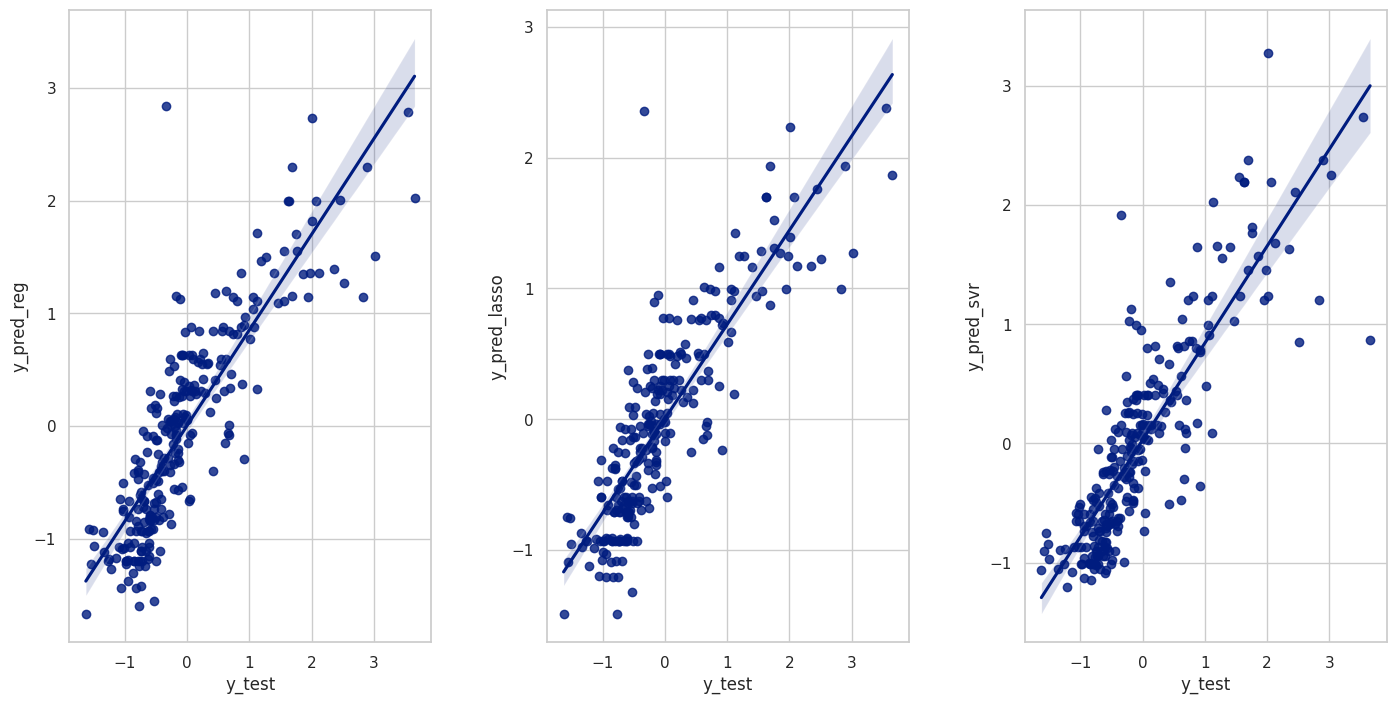

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

### 8) California Dataframe Visualization

#### a) Visualize the Target

<Axes: xlabel='Median_House_Value', ylabel='Density'>

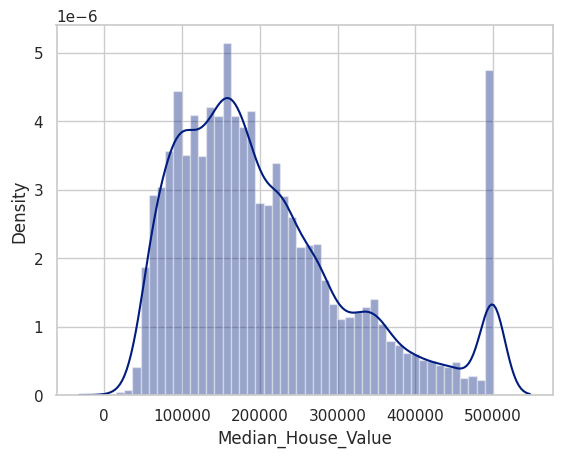

In [ ]:
sns.distplot(california_df["Median_House_Value"])

#### b) Correlation Matrix

<Axes: >

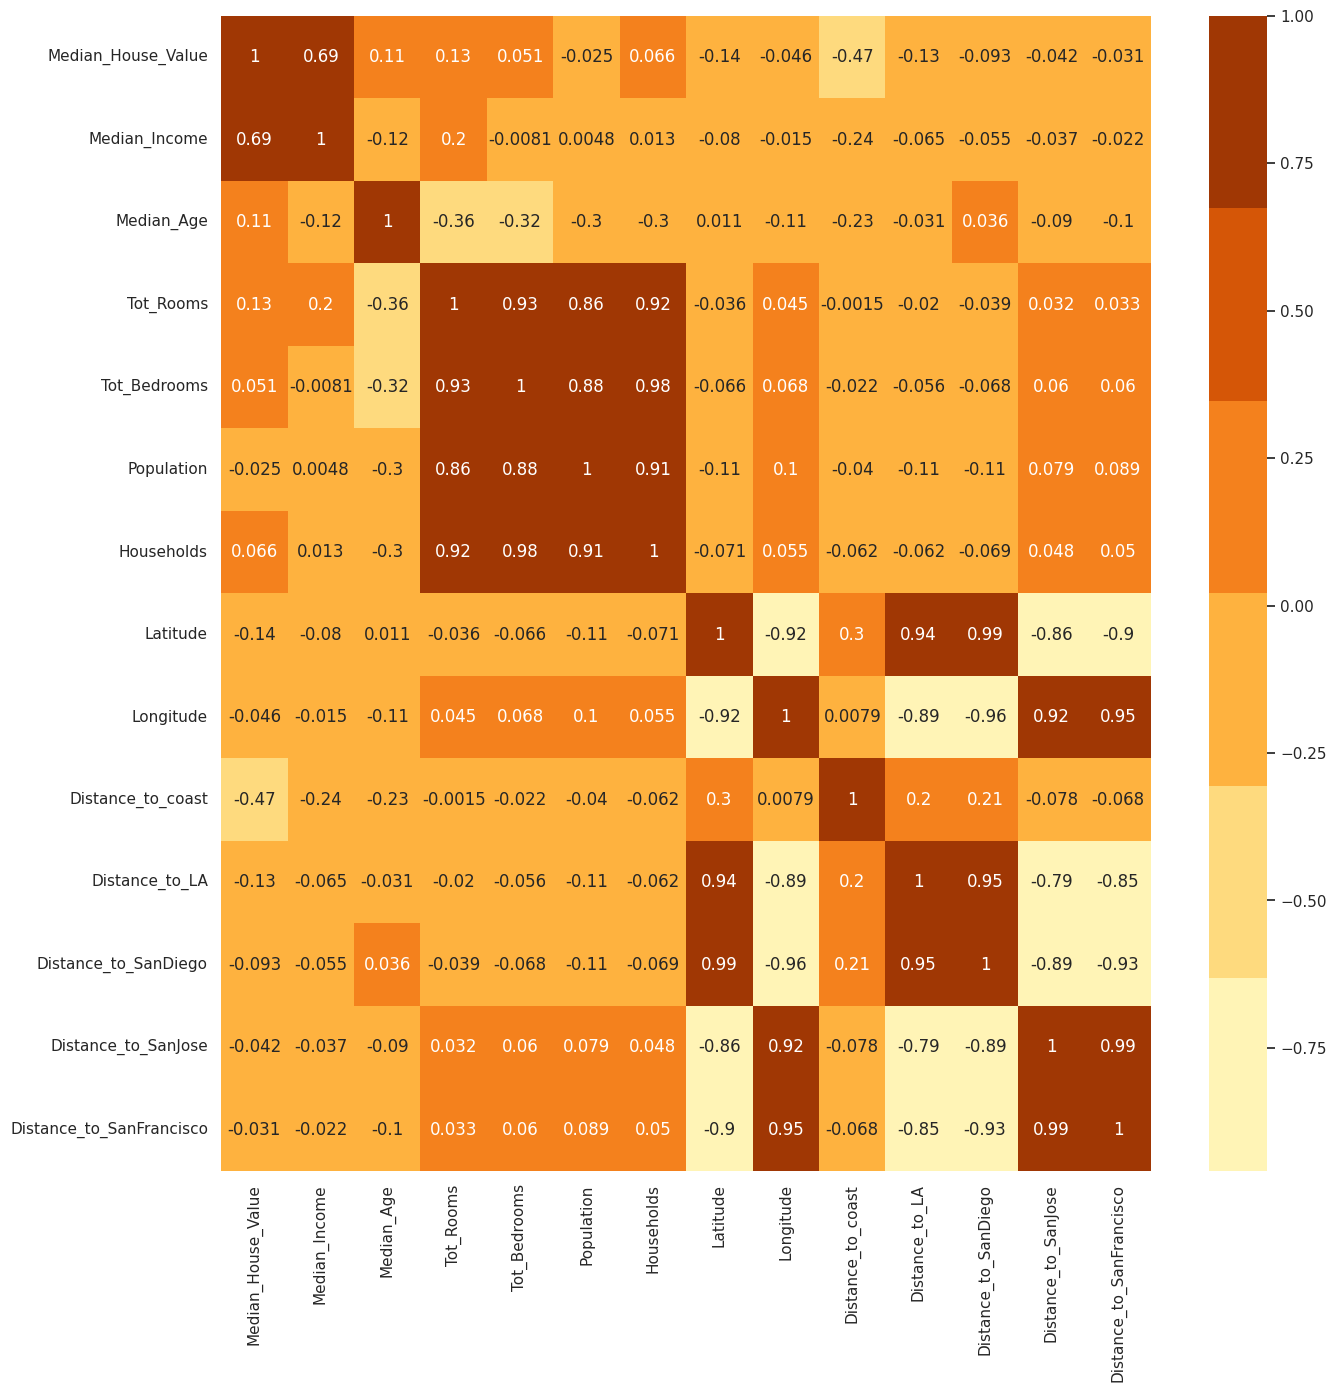

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(california_df.corr(),annot=True,cmap=sns.color_palette("YlOrBr"))

#### c) Pairplot to view the distribution

The most useful features are :  ['Median_House_Value', 'Median_Income', 'Distance_to_coast', 'Latitude', 'Tot_Rooms']


<Figure size 1000x1000 with 0 Axes>

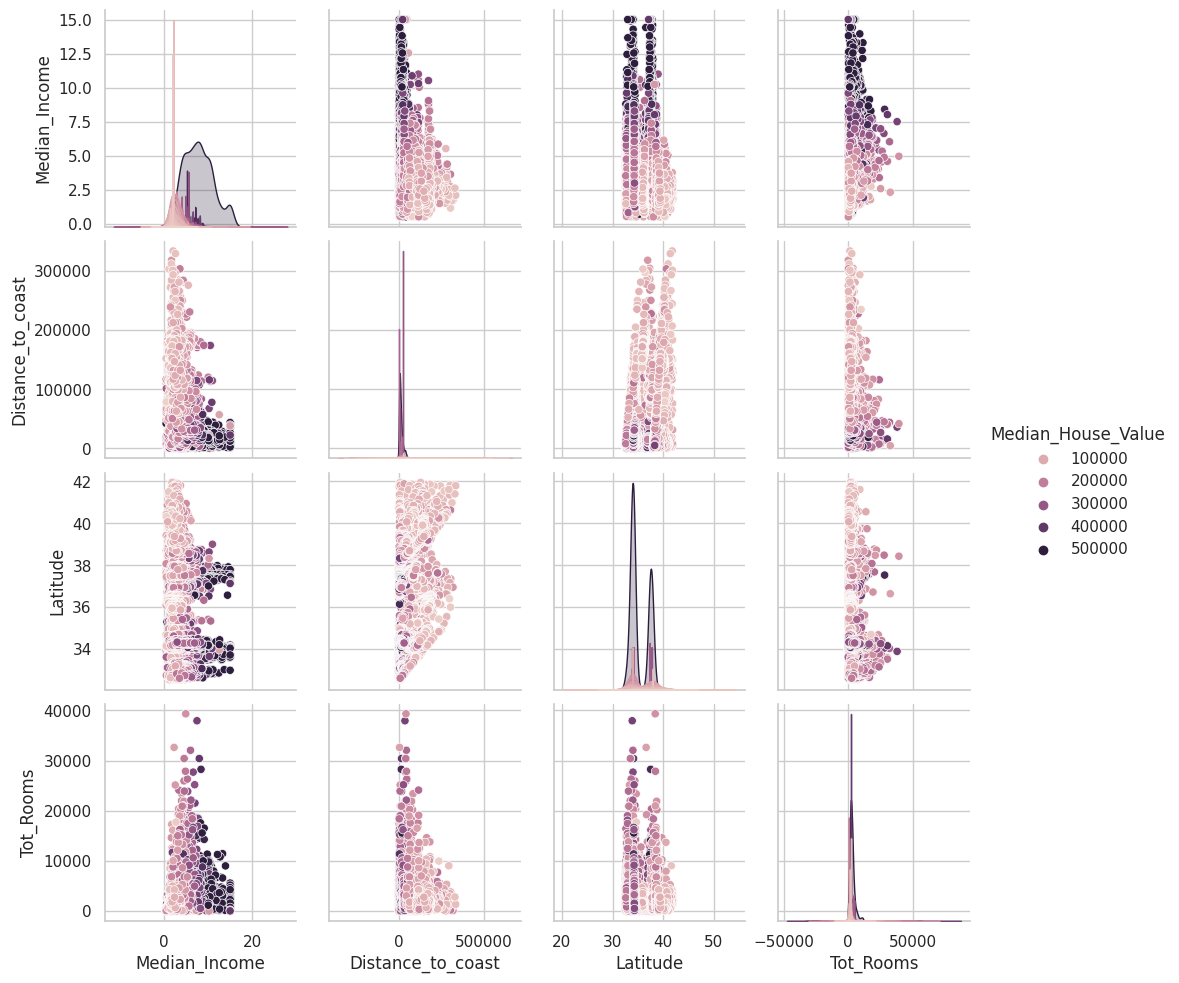

In [ ]:
useful_features = abs(california_df.corr()["Median_House_Value"]).sort_values(ascending=False)[:5].index.tolist()
print("The most useful features are : ",useful_features)
plt.figure(figsize=(10,10))
sns.pairplot(california_df[useful_features],hue="Median_House_Value")

### 9) Model Prediction for California data



In [ ]:
useful_features = abs(california_df.corr()["Median_House_Value"]).sort_values(ascending=False)[1:6].index.tolist()
print(useful_features)

['Median_Income', 'Distance_to_coast', 'Latitude', 'Tot_Rooms', 'Distance_to_LA']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error

X = california_df[useful_features]
y = california_df["Median_House_Value"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print(reg.intercept_)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

-385355.9058065885
The mean squared error for LinearRegression : 5666512168.019704
The mean squared error for LassoRegression : 5666512843.823842
The mean squared error for SVR : 14591549526.630804


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

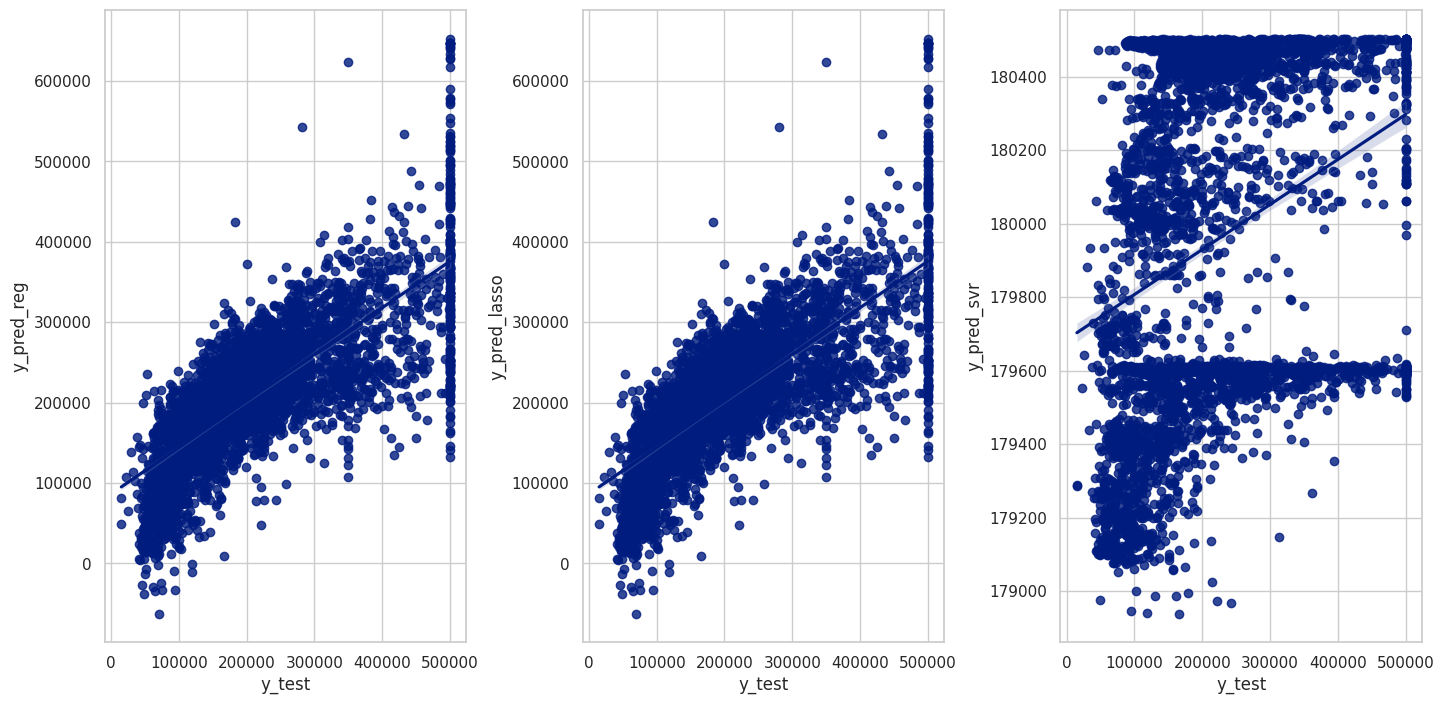

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

useful_features = useful_features + ["Median_House_Value"]
mapper = DataFrameMapper([(useful_features, StandardScaler())])
scaled_features = mapper.fit_transform(california_df[useful_features].copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=california_df.index, columns=useful_features)

In [ ]:
scaled_features_df.head()

,Median_Income,Distance_to_coast,Latitude,Tot_Rooms,Distance_to_LA,Median_House_Value
0,2.344766,-0.635876,1.052548,-0.804819,1.158969,2.129631
1,2.332238,-0.616285,1.043185,2.045890,1.149889,1.314156
2,1.782699,-0.656307,1.038503,-0.535746,1.151224,1.258693
3,0.932968,-0.666299,1.038503,-0.624215,1.153580,1.165100
4,-0.012881,-0.666299,1.038503,-0.462404,1.153580,1.172900


In [ ]:
X = scaled_features_df[['Median_Income', 'Distance_to_coast', 'Latitude', 'Tot_Rooms', 'Distance_to_LA']]
y = scaled_features_df["Median_House_Value"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

The mean squared error for LinearRegression : 0.4255574999812065
The mean squared error for LassoRegression : 0.45616217911888146
The mean squared error for SVR : 0.32820026466205104


In [ ]:
scaled_features_df.columns

Index(['Median_Income', 'Distance_to_coast', 'Latitude', 'Tot_Rooms',
       'Distance_to_LA', 'Median_House_Value'],
      dtype='object')

In [ ]:
implement_online(scaled_features_df,['Median_Income', 'Distance_to_coast', 'Latitude', 'Tot_Rooms', 'Distance_to_LA'],"Median_House_Value")

0.4401951130908638


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

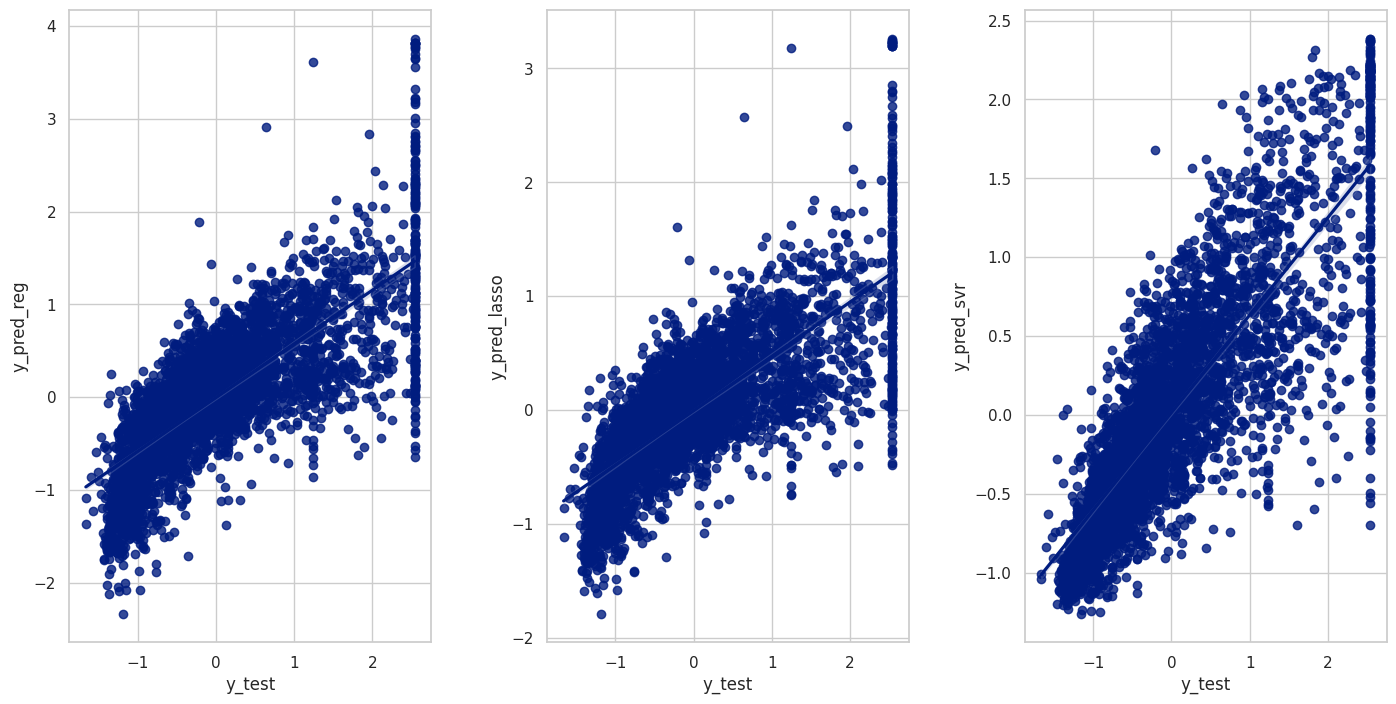

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")


### 10) Training by batches

In [ ]:
# Train the california dataframe using batches,
# Use SGDRegressor if needed

batch_size = 1000
temp_df = california_df[useful_features]
print(temp_df.shape)

(20640, 6)


In [ ]:
for i in range(0,california_df.shape[0],batch_size):
  X = california_df[useful_features][i:i+batch_size]
  y = california_df["Median_House_Value"][i:i+batch_size]
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

  reg = LinearRegression()
  reg.fit(X_train,y_train)
  y_pred_reg = reg.predict(X_test)

  print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

The mean squared error for LinearRegression : 4.682504011540179e-22
The mean squared error for LinearRegression : 1.3126363704481486e-21
The mean squared error for LinearRegression : 9.020900888258298e-22
The mean squared error for LinearRegression : 4.008848120676993e-21
The mean squared error for LinearRegression : 1.5431881507789284e-20
The mean squared error for LinearRegression : 1.563305183276218e-20
The mean squared error for LinearRegression : 3.404013656778219e-21
The mean squared error for LinearRegression : 7.792703114739563e-22
The mean squared error for LinearRegression : 6.639679515289647e-21
The mean squared error for LinearRegression : 2.8845971716541215e-20
The mean squared error for LinearRegression : 6.638620724105579e-21
The mean squared error for LinearRegression : 1.3284652986499633e-20
The mean squared error for LinearRegression : 1.998799232173136e-21
The mean squared error for LinearRegression : 1.2244986218193984e-20
The mean squared error for LinearRegression

In [ ]:
for i in range(0,scaled_features_df.shape[0],batch_size):
  X = scaled_features_df[i:i+batch_size]
  y = scaled_features_df["Median_House_Value"][i:i+batch_size]
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

  reg = LinearRegression()
  reg.fit(X_train,y_train)
  y_pred_reg = reg.predict(X_test)

  print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

The mean squared error for LinearRegression : 7.301435179499802e-31
The mean squared error for LinearRegression : 6.012956449416592e-31
The mean squared error for LinearRegression : 7.885527564299098e-32
The mean squared error for LinearRegression : 1.9764669573850193e-31
The mean squared error for LinearRegression : 8.45384812510245e-31
The mean squared error for LinearRegression : 9.483732128705331e-31
The mean squared error for LinearRegression : 2.0933841739895565e-31
The mean squared error for LinearRegression : 1.3189914131056973e-31
The mean squared error for LinearRegression : 8.897502939679065e-32
The mean squared error for LinearRegression : 1.0504166361433814e-31
The mean squared error for LinearRegression : 4.761105799808958e-30
The mean squared error for LinearRegression : 1.0589113752218585e-30
The mean squared error for LinearRegression : 1.7491903626563573e-31
The mean squared error for LinearRegression : 4.1126651088716376e-31
The mean squared error for LinearRegressio

### 11) Kaggle Competition dataset

In [ ]:
kaggle_df_train.describe()["SalePrice"]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
kaggle_df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
kaggle_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
if remove_null_values(kaggle_df_train):
  print("All null values are removed in ames dataframe")
if remove_null_values(kaggle_df_test):
  print("All null values are removed in ames dataframe")

The columns with null values before preprocessing are :  Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
These columns have more than 40% null values hence they will be removed : 
 ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
The columns with null values after forward fill are : 
 Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')
All null values are removed in ames dataframe
The columns with null values before preprocessing are :  Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQua

In [ ]:
important_features = abs(kaggle_df_train.corr()["SalePrice"]).sort_values(ascending=False).index.tolist()[1:11]

In [ ]:
important_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [ ]:
len(kaggle_df_train.columns)

76

### 12) Kaggle Competition Model

In [ ]:
# Choose only 70% of the data for initial model fitting

X = kaggle_df_train[important_features]
y = kaggle_df_train["SalePrice"]

rows,col = kaggle_df_train[important_features].shape

# Fitting the model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

The mean squared error for LinearRegression : 2407902549.2923393


### Online Training on dataset

In [ ]:
#print(check(kaggle_df_train[important_features+["SalePrice"]],important_features,"SalePrice"))

In [ ]:
kaggle_df_train["SalePrice"].iloc[1023]

140000

In [ ]:

# Choose only 70% of the data for initial model fitting
X = kaggle_df_train[important_features]
y = kaggle_df_train["SalePrice"]

rows,col = kaggle_df_train[important_features].shape
length = int(rows/100*70)

# Seperate the data to perform 70% model fitting and 30% incremental learning
X_model_fitting = kaggle_df_train[important_features][:length]
y_model_fitting = kaggle_df_train["SalePrice"][:length]

X_online_training = kaggle_df_train[important_features][length:]
y_online_training = kaggle_df_train["SalePrice"][length:]

# Fitting the model on 70% data
X_train, X_test, y_train, y_test = train_test_split(X_model_fitting,y_model_fitting,test_size=0.2,random_state=5)
reg = SGDRegressor(warm_start=True)
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

# Performing incremental learning on 30% data
X_train, X_test, y_train, y_test = train_test_split(X_online_training,y_online_training,test_size=0.2,random_state=5)
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

# Paritally fitting the data
X_train, X_test, y_train, y_test = train_test_split(X_model_fitting,y_model_fitting,test_size=0.2,random_state=5)
reg = SGDRegressor(warm_start=True)
reg.partial_fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

# Performing incremental learning on 30% data
X_train, X_test, y_train, y_test = train_test_split(X_online_training,y_online_training,test_size=0.2,random_state=5)
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

The mean squared error for LinearRegression : 3.0395107302567137e+31
The mean squared error for LinearRegression : 2.5283549972800698e+31
The mean squared error for LinearRegression : 1.7942222884367015e+32
The mean squared error for LinearRegression : 3.3814075311366885e+31


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error

X = kaggle_df_train[important_features]
y = kaggle_df_train["SalePrice"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print(reg.intercept_)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

-1154624.8558104932
The mean squared error for LinearRegression : 1072408281.5150629
The mean squared error for LassoRegression : 1072404432.1165847
The mean squared error for SVR : 5222734472.508495


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

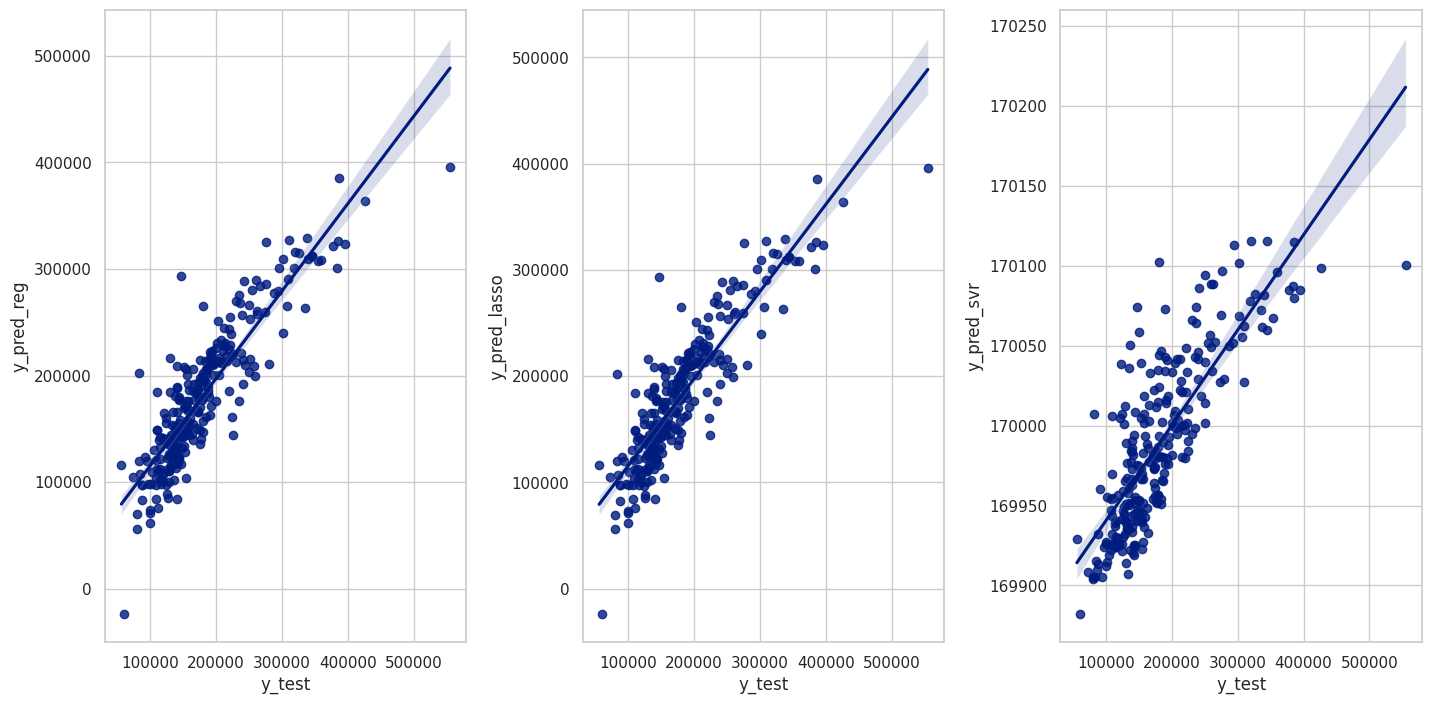

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(kaggle_df_train[important_features+["SalePrice"]].columns, StandardScaler())])
scaled_features = mapper.fit_transform(kaggle_df_train[important_features+["SalePrice"]].copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=kaggle_df_train[important_features+["SalePrice"]].index, columns=kaggle_df_train[important_features+["SalePrice"]].columns)

In [ ]:
scaled_features_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.589337,0.331321,0.202747,0.249341,-0.828516,-0.591875,0.775560,0.915080,1.014157,0.854216,0.275571
1,-0.165963,-0.529579,0.202747,-0.222023,0.221935,0.409598,0.775560,-0.347165,0.100528,-0.476562,-0.066702
2,0.589337,0.477367,0.202747,0.570726,-0.662928,-0.434007,0.775560,-0.347165,0.946480,0.804928,0.465722
3,0.589337,0.344773,1.779928,0.752844,-0.556848,-0.838543,-1.051375,0.283958,-1.963596,-0.772291,-0.592789
4,1.344638,1.269088,1.779928,1.791989,-0.080781,0.120996,0.775560,1.546203,0.912642,0.706352,0.801657


### Online training on scaled features

In [ ]:
X = scaled_features_df[important_features]
y = scaled_features_df["SalePrice"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

The mean squared error for LinearRegression : 0.38695207011185195
The mean squared error for LassoRegression : 0.28262691227446496
The mean squared error for SVR : 0.136839825545577


In [ ]:
implement_online(scaled_features_df,important_features,"SalePrice")

0.17733675751693756


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

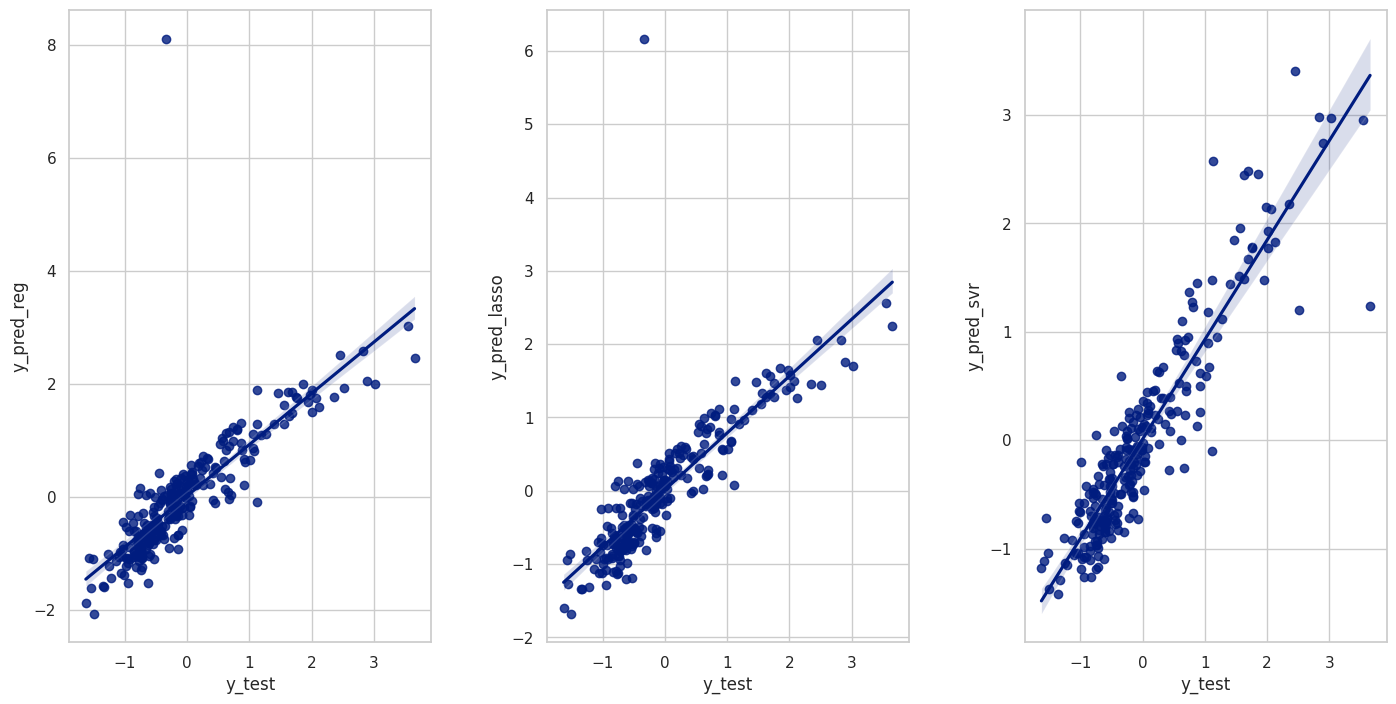

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

### 13) Northern Ireland Dataset

In [ ]:
antrim_df["Sale Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [ ]:
antrim_df.head(5)

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,Antrim and Newtownabbey,Abbey,2005,85,24920,74000,82000,93427,108901,220000
1,Antrim and Newtownabbey,Abbey,2006,120,45000,86000,111000,121329,138000,499000
2,Antrim and Newtownabbey,Abbey,2007,57,30000,159975,192500,221449,238458,660000
3,Antrim and Newtownabbey,Abbey,2008,31,.,.,.,.,.,.
4,Antrim and Newtownabbey,Abbey,2009,22,.,.,.,.,.,.


In [ ]:
antrim_df["Local Government District"] = l.fit_transform(antrim_df["Local Government District"])
antrim_df["Electoral Ward (2014)"] = l.fit_transform(antrim_df["Electoral Ward (2014)"])

In [ ]:
def convert_str_to_int(column):
  data = []
  for val in antrim_df[column]:
    try:
      data.append(int(val))
    except:
      data.append(None)
  antrim_df[column] = data

In [ ]:
columns = ['Minimum Sale Price','Lower Quartile Sale Price', 'Median Sale Price','Simple Mean Sale Price', 'Upper Quartile Sale Price','Maximum Sale Price']

In [ ]:
for val in columns:
  convert_str_to_int(val)

In [ ]:
antrim_df.ffill(axis=0,limit=1,inplace=True)
antrim_df.bfill(axis=0,limit=1,inplace=True)
antrim_df.head(10)

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,0,0,2005,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0
1,0,0,2006,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0
2,0,0,2007,57,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0
3,0,0,2008,31,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0
4,0,0,2009,22,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,2010,41,40000.0,65500.0,117000.0,115198.0,139500.0,270000.0
6,0,0,2011,46,40000.0,65500.0,117000.0,115198.0,139500.0,270000.0
7,0,0,2012,44,28000.0,55000.0,74000.0,100307.0,135000.0,335000.0
8,0,0,2013,53,38500.0,52625.0,76000.0,93885.0,125000.0,249000.0
9,0,0,2014,42,36000.0,76000.0,109000.0,114093.0,137000.0,345000.0


In [ ]:
antrim_df.interpolate(inplace=True)
antrim_df.head()

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,0,0,2005,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0
1,0,0,2006,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0
2,0,0,2007,57,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0
3,0,0,2008,31,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0
4,0,0,2009,22,35000.0,112737.5,154750.0,168323.5,188979.0,465000.0


In [ ]:
antrim_df.drop(columns=["Local Government District"],inplace=True)

### 14) Northern Ireland Model

In [ ]:
antrim_df.columns

Index(['Electoral Ward (2014)', 'Sale Year', 'No. of Verified Sales',
       'Minimum Sale Price', 'Lower Quartile Sale Price', 'Median Sale Price',
       'Simple Mean Sale Price', 'Upper Quartile Sale Price',
       'Maximum Sale Price'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error

X = antrim_df[['Electoral Ward (2014)', 'Sale Year', 'No. of Verified Sales','Minimum Sale Price', 'Lower Quartile Sale Price', 'Median Sale Price',
       'Simple Mean Sale Price', 'Upper Quartile Sale Price']]
y = antrim_df["Maximum Sale Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print(reg.intercept_)
print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

4231779.055466895
The mean squared error for LinearRegression : 3589664554.400977
The mean squared error for LassoRegression : 3589663642.7173657
The mean squared error for SVR : 27412326594.46891


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

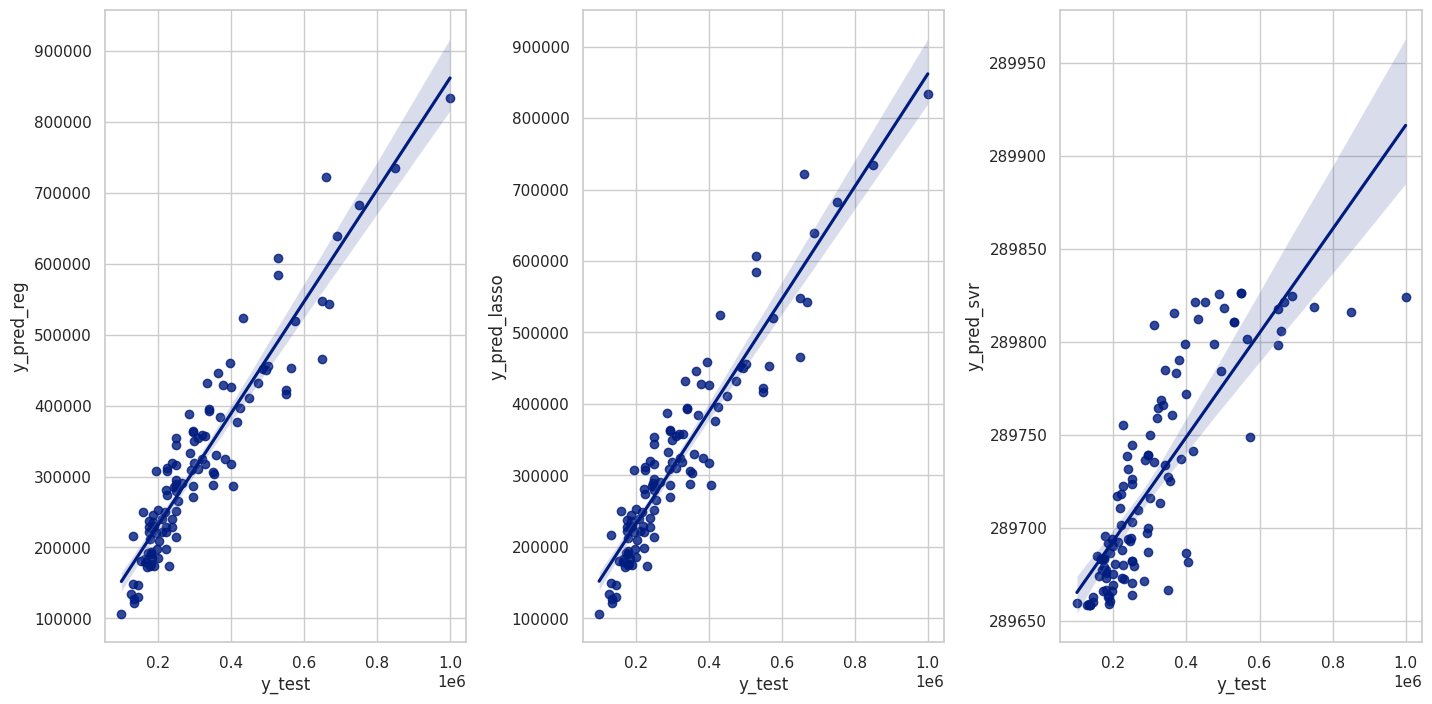

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(antrim_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(antrim_df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=antrim_df.index, columns=antrim_df.columns)

In [ ]:
scaled_features_df.head()

,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,-1.689278,-1.612452,1.410047,-1.545149,-0.886583,-1.151721,-0.984970,-0.998460,-0.593118
1,-1.689278,-1.364382,2.689533,-0.585028,-0.601074,-0.558049,-0.477596,-0.554178,0.921720
2,-1.689278,-1.116313,0.386457,-1.302250,1.158965,1.110374,1.343001,0.979609,1.795873
3,-1.689278,-0.868243,-0.564019,-1.302250,1.158965,1.110374,1.343001,0.979609,1.795873
4,-1.689278,-0.620174,-0.893030,-1.063176,0.035074,0.337577,0.376959,0.224167,0.737116


In [ ]:
X = scaled_features_df[['Electoral Ward (2014)', 'Sale Year', 'No. of Verified Sales', 'Minimum Sale Price',
                        'Lower Quartile Sale Price', 'Median Sale Price','Simple Mean Sale Price', 'Upper Quartile Sale Price']]
y = scaled_features_df["Maximum Sale Price"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print("The mean squared error for LinearRegression : {}".format(mean_squared_error(y_pred_reg,y_test)))

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("The mean squared error for LassoRegression : {}".format(mean_squared_error(y_pred_lasso,y_test)))

from sklearn.svm import SVR
clf = SVR(C=1.0,epsilon=0.5)
clf.fit(X_train,y_train)
y_pred_svr = clf.predict(X_test)

print("The mean squared error for SVR : {}".format(mean_squared_error(y_pred_svr,y_test)))

The mean squared error for LinearRegression : 0.1500094974598942
The mean squared error for LassoRegression : 0.3220566412988308
The mean squared error for SVR : 0.29454376156183815


<Axes: xlabel='y_test', ylabel='y_pred_svr'>

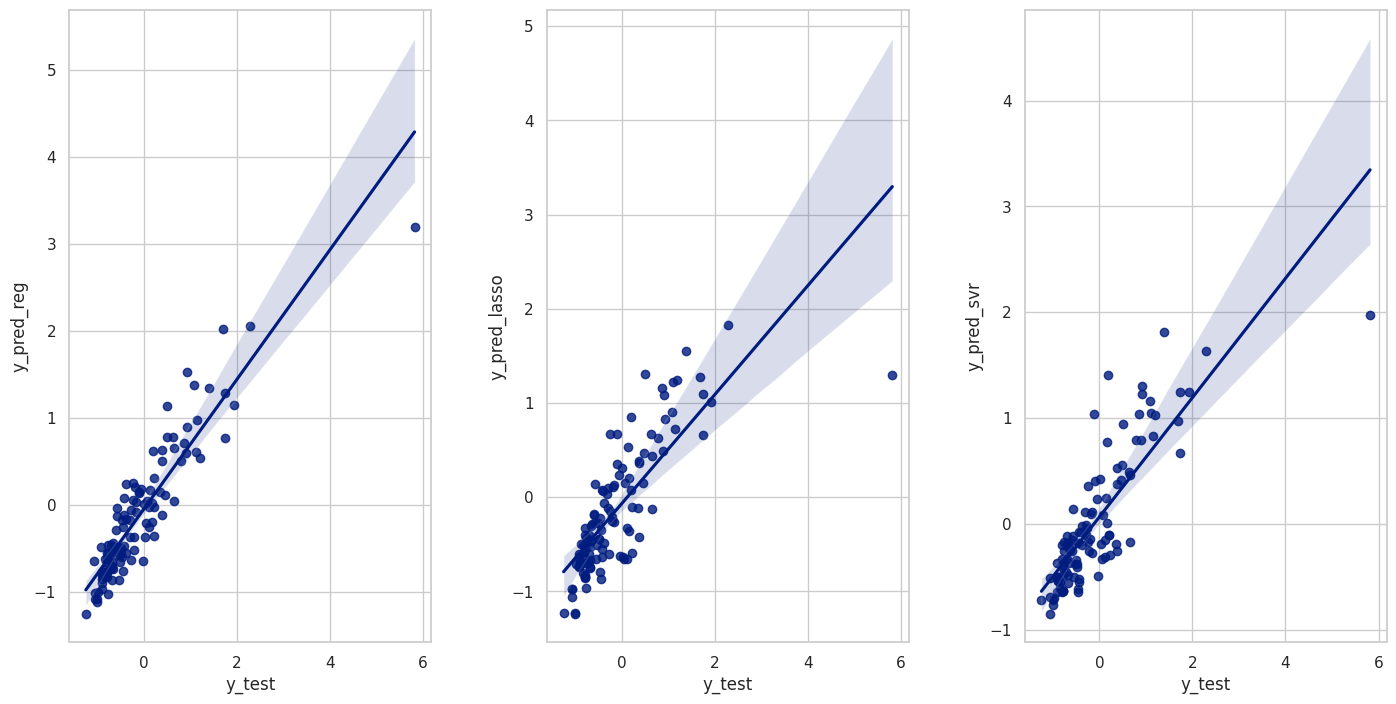

In [ ]:
visualization_data = pd.DataFrame({"y_test":y_test,"y_pred_reg":y_pred_reg,"y_pred_lasso":y_pred_lasso,"y_pred_svr":y_pred_svr})
fig,axes = plt.subplots(1,3,sharex = True,figsize=(15,8))
fig.tight_layout(pad=4.0)

sns.regplot(ax=axes[0],data=visualization_data,x="y_test",y="y_pred_reg")
sns.regplot(ax=axes[1],data=visualization_data,x="y_test",y="y_pred_lasso")
sns.regplot(ax=axes[2],data=visualization_data,x="y_test",y="y_pred_svr")

In [ ]:
implement_online(scaled_features_df,['Electoral Ward (2014)', 'Sale Year', 'No. of Verified Sales', 'Minimum Sale Price',
                        'Lower Quartile Sale Price', 'Median Sale Price','Simple Mean Sale Price', 'Upper Quartile Sale Price'],"Maximum Sale Price")

0.21750377962548895
